## **MODELING - USING SELECTED FEATURES**

*Here I will recreate the models but i will reduce the number of featutres used to see if i can get better results, instead of using the columns as features i will look at the correlation matrix and see which variables have a higher correlation with the target and use those as features to see if i can improve the models.*

In [1]:
# loaing libraries for modelling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os 

In [2]:
# Load data
df = pd.read_csv('/home/astrosanderson/Desktop/telecom-churn-prediction/data/processed/telecom_churn_processed.csv')

In [3]:
# preview data
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,-0.439916,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,2505,0
1,3962,1,-0.439916,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,1466,0
2,2564,1,-0.439916,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,157,1
3,5535,1,-0.439916,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,1400,0
4,6511,0,-0.439916,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,925,1
5,6551,0,-0.439916,0,0,-0.992402,1,2,1,0,...,2,0,2,2,0,1,2,1.159546,6104,1
6,1002,1,-0.439916,0,1,-0.422317,1,2,1,0,...,0,0,2,0,0,1,1,0.808907,1550,0
7,4770,0,-0.439916,0,0,-0.910961,0,1,0,2,...,0,0,0,0,0,0,3,-1.163647,2609,0
8,5604,0,-0.439916,1,0,-0.177995,1,2,1,0,...,2,2,2,2,0,1,2,1.330711,2646,1
9,4534,1,-0.439916,0,1,1.206498,1,0,0,2,...,0,0,0,0,1,0,0,-0.286218,3022,0


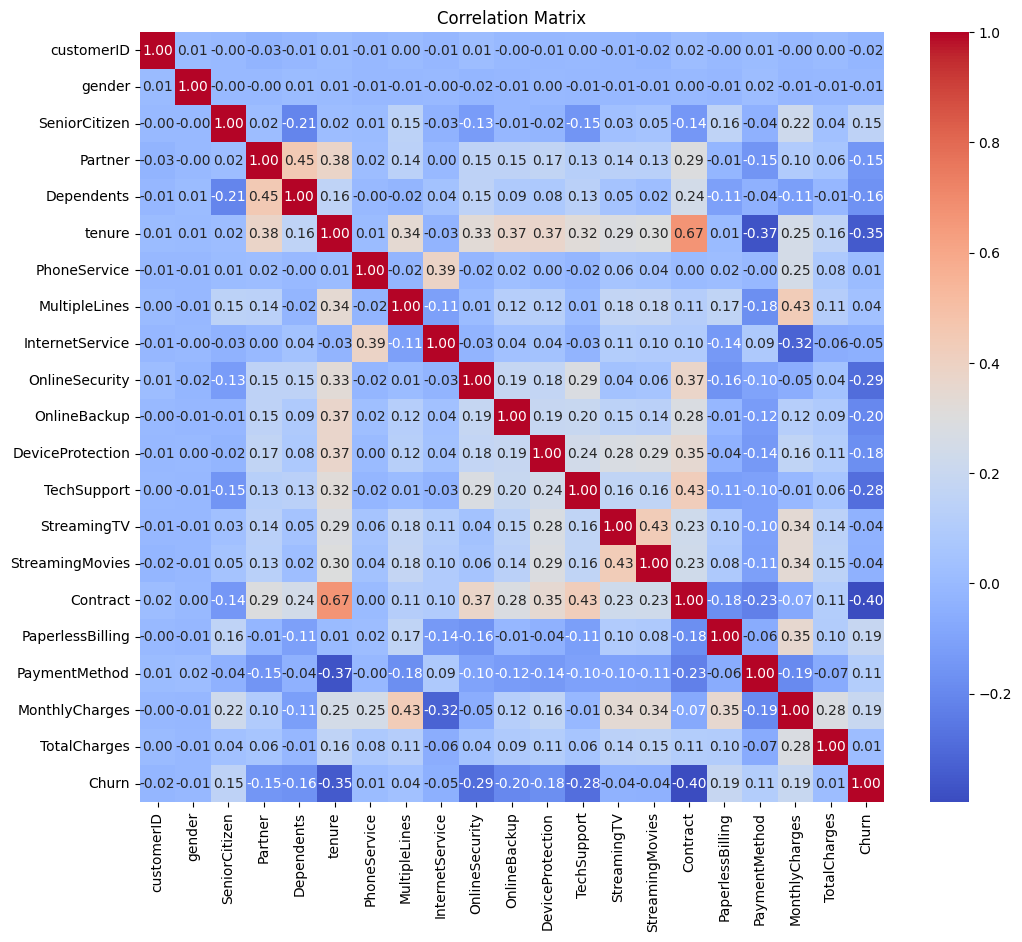

In [4]:
# Correlation matrix
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

*Looking our target, Churn, we can see a correlation with **MonthlyCharges, PaperlessBilling, SeniorCitizen and lastly PaymentMethod.** These are the variables with high correlations which i will use in the prediction models.*

## 1. *Training baseline model: Logistic Regression*

Confusion Matrix:
[[1000   36]
 [ 331   42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.84      1036
           1       0.54      0.11      0.19       373

    accuracy                           0.74      1409
   macro avg       0.64      0.54      0.52      1409
weighted avg       0.69      0.74      0.67      1409



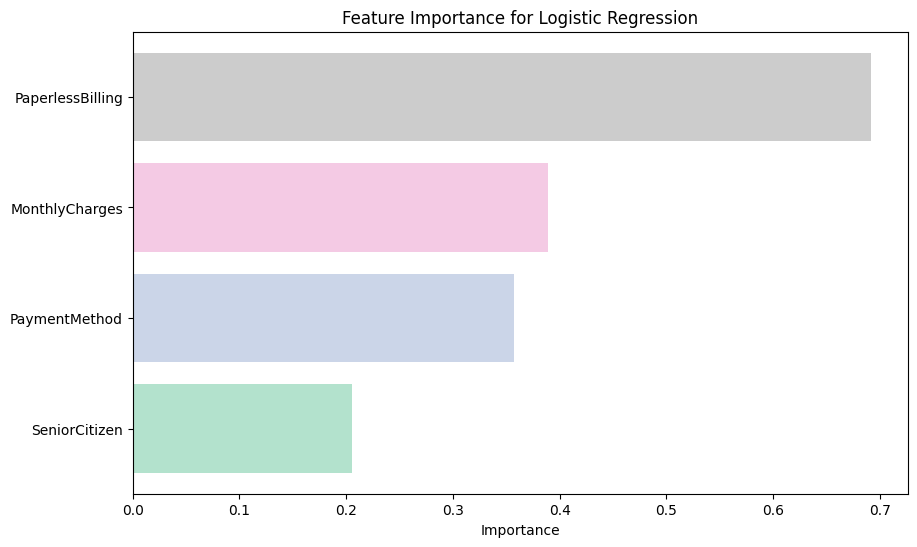

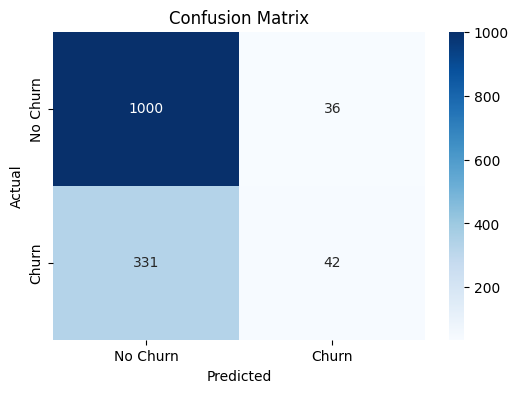

In [5]:
# Training baseline logistic regression model

features = ['MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'PaymentMethod']
X = df[features]
y = df['Churn']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# plotting feature importance sorted in decreasing order using horizontal bar chart with different colors
importance = model.coef_[0]
features = X.columns
sorted_indices = np.argsort(importance)
plt.figure(figsize=(10,6))
plt.barh(features[sorted_indices], importance[sorted_indices], color=plt.cm.Pastel2((importance[sorted_indices] - min(importance)) / (max(importance) - min(importance))))
plt.xlabel('Importance')
plt.title('Feature Importance for Logistic Regression')
plt.show()


# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### 2. *Advanced: RandomForest*

Confusion Matrix:
[[835 201]
 [233 140]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1036
           1       0.41      0.38      0.39       373

    accuracy                           0.69      1409
   macro avg       0.60      0.59      0.59      1409
weighted avg       0.68      0.69      0.69      1409



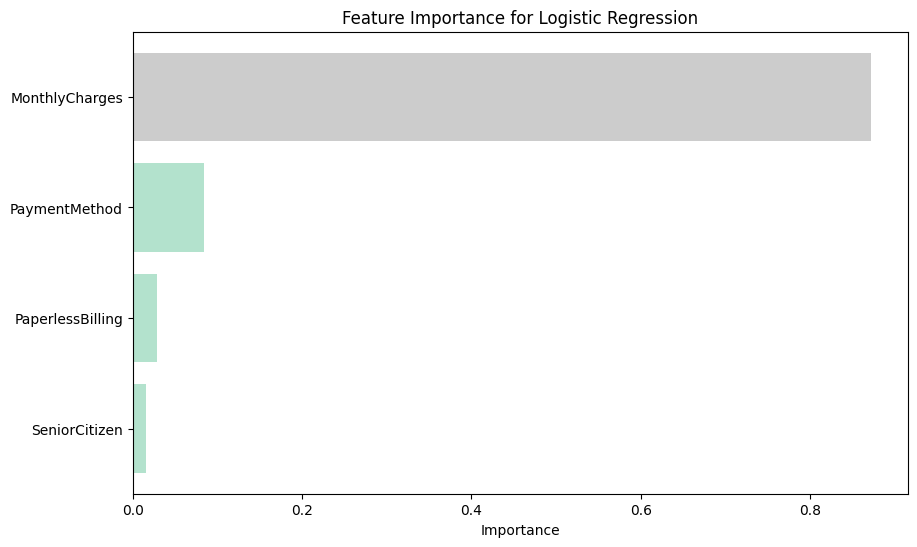

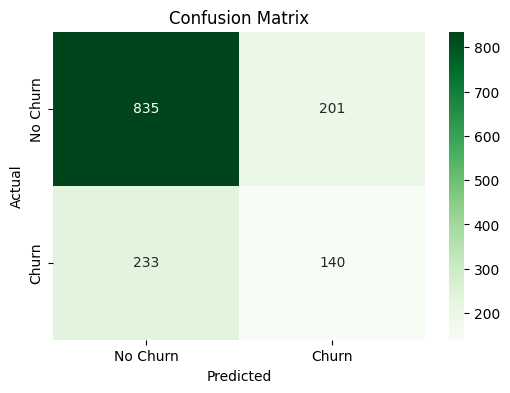

In [6]:
# Training Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# plotting feature importance for Random Forest
importance = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(importance)
plt.figure(figsize=(10,6))
plt.barh(features[sorted_indices], importance[sorted_indices], color=plt.cm.Pastel2((importance[sorted_indices] - min(importance)) / (max(importance) - min(importance))))
plt.xlabel('Importance')
plt.title('Feature Importance for Logistic Regression')
plt.show()

# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### 3. *Advanced: XGBoost*

/home/astrosanderson/Desktop/telecom-churn-prediction/telecom/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:11:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[926 110]
 [244 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1036
           1       0.54      0.35      0.42       373

    accuracy                           0.75      1409
   macro avg       0.67      0.62      0.63      1409
weighted avg       0.72      0.75      0.73      1409



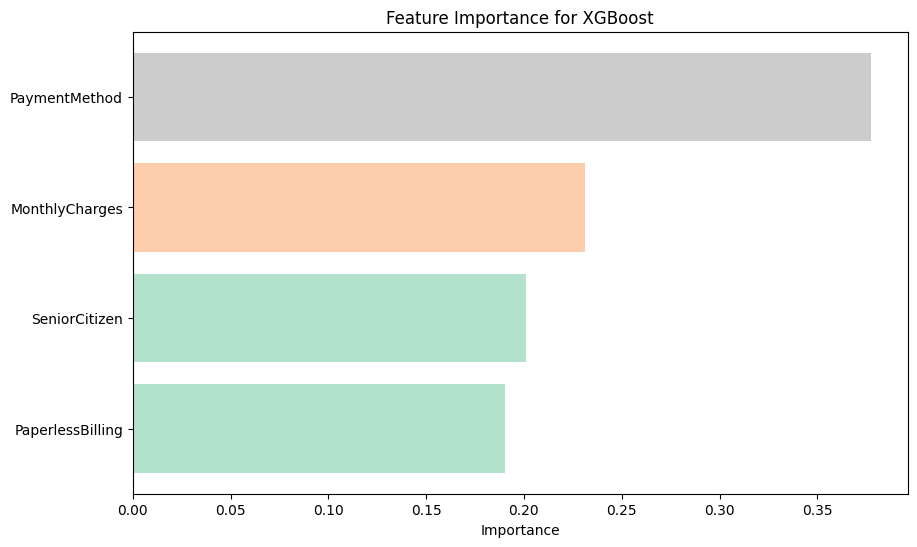

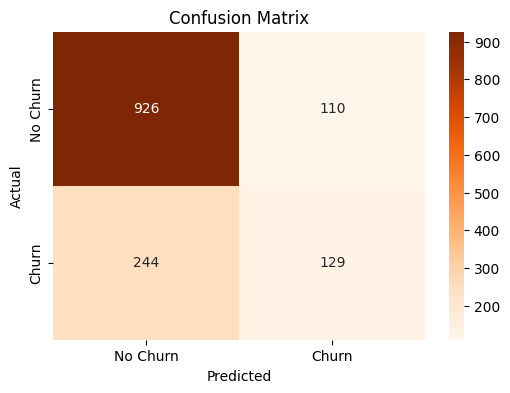

In [7]:
# Training XGBoost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) 

# plotting feature importance for XGBoost
importance = xgb_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(importance)
plt.figure(figsize=(10,6))
plt.barh(features[sorted_indices], importance[sorted_indices], color=plt.cm.Pastel2((importance[sorted_indices] - min(importance)) / (max(importance) - min(importance))))
plt.xlabel('Importance')
plt.title('Feature Importance for XGBoost')
plt.show()  

# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression model saved successfully.
